<center><h1>Analysis of the Serie A team performance</h1></center>
<center><h2>Data collection and extraction</h2></center>
<p>The Serie A <a href="http://www.legaseriea.it/en">website</a> contains an archive of league tables since the 1986-1987 season. Those data are archived by year. http://www.legaseriea.it/en/serie-a-tim/league-table/2015-16 The URL's format is very easy to understand. We can access different season's league table by change one part of the URL. The simple format of the URL makes the automation of the data collection process very simple. We only need to loop the year to access those URLs.</p>
<p>All of the league table data is under the table called tabella. We can use this pattern to parse all of the data from the website.</p>
<p>The script below uses the function takes as input season. It downloads the content of that URL. The output is a list of URLs of the individual seasons.</p>
<p>In the example below, the script downloads the league table from season 2010-11 to season 2015-16.</p>

In [3]:
import urllib.request
import time
import random

#Seria A league table from 10-11 to 15-16

for y in range (10, 16, 1):
    
    tmp = random.random()*5.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)

    
    url = 'http://www.legaseriea.it/en/serie-a-tim/league-table/20' + str(y) +'-'+ str(y+1)
    print ('Download from :', url)
    
    #dowlnload
    filehandle = urllib.request.urlopen(url)
    html = filehandle.read()



    fileout = 'SoccerYear/20'+str(y+1)+'.html'
    print ('Save to : ', fileout, '\n')

    #save file to disk
    f = open(fileout,'w')
    f.write(html.decode('utf-8'))
    f.close()

Sleep for  4.94947310462983  seconds
Download from : http://www.legaseriea.it/en/serie-a-tim/league-table/2010-11
Save to :  SoccerYear/2011.html 

Sleep for  0.7924280290441543  seconds
Download from : http://www.legaseriea.it/en/serie-a-tim/league-table/2011-12
Save to :  SoccerYear/2012.html 

Sleep for  3.1453065552698027  seconds
Download from : http://www.legaseriea.it/en/serie-a-tim/league-table/2012-13
Save to :  SoccerYear/2013.html 

Sleep for  3.2608525959338595  seconds
Download from : http://www.legaseriea.it/en/serie-a-tim/league-table/2013-14
Save to :  SoccerYear/2014.html 

Sleep for  0.9383729642873812  seconds
Download from : http://www.legaseriea.it/en/serie-a-tim/league-table/2014-15
Save to :  SoccerYear/2015.html 

Sleep for  1.5733570414318543  seconds
Download from : http://www.legaseriea.it/en/serie-a-tim/league-table/2015-16
Save to :  SoccerYear/2016.html 



<p>The function below use BeautifulSoup library to analyze the downloaded data by extract data from the table called tabella. </p>

In [36]:
import pickle

from bs4 import BeautifulSoup
def parse_page(fname):
    print ('Parsing {}'.format(fname))
    # Let's store all the necessary information in this dictionary
    pageData = dict()
    pageData['filename'] = fname
    #pageData['topList'] = list()
    
    html_doc = open(fname,'r').read()
    soup = BeautifulSoup(html_doc, 'html.parser') # Parse html content using BeautifulSoup
    
    contentList = soup.find('table', {'class':'tabella'})
    
    tableScore = contentList.find('tbody')
    
    
    pageData = []
    

    # Iterate through rows and columns to parse URLs
    for i,row in enumerate(tableScore.find_all('tr')):
        rowData = list()
        columns = row.find_all('td')
        
        #<span class="pos">1</span>
        standing = columns[0].find('span', {'class':'pos'}).text
        team = columns[0].find('img')['title']
        points = columns[1].text
        wins = columns[3].text

        
        pageData.append([standing, team, points, wins])
        
        
        #print (standing, team, points)
        
    return pageData

Dataset = dict()
for y in [2011, 2012, 2013, 2014, 2015, 2016]:
    fname = 'SoccerYear/{}.html'.format(y)
    #try:
    pData = parse_page(fname)
    
    #print(pData)
    
    Dataset[str(y)] = pData
    #except Exception as e:
    #    print ('[ERROR]: {}'.format(e))
    #break  
          
print(Dataset)
        
# Store extracted information into a file. Later we can easily load it without repeating preprocessing.
#pickle.dump(memeDataset, open('memecenter/page_data.pkl','wb'))

Parsing SoccerYear/2011.html
Parsing SoccerYear/2012.html
Parsing SoccerYear/2013.html
Parsing SoccerYear/2014.html
Parsing SoccerYear/2015.html
Parsing SoccerYear/2016.html
{'2011': [['1', 'MILAN', '82', '24'], ['2', 'INTER', '76', '23'], ['3', 'NAPOLI', '70', '21'], ['4', 'UDINESE', '66', '20'], ['5', 'LAZIO', '66', '20'], ['6', 'ROMA', '63', '18'], ['7', 'JUVENTUS', '58', '15'], ['8', 'PALERMO', '56', '17'], ['9', 'FIORENTINA', '51', '12'], ['10', 'GENOA', '51', '14'], ['11', 'CHIEVOVERONA', '46', '11'], ['12', 'PARMA', '46', '11'], ['13', 'CATANIA', '46', '12'], ['14', 'CAGLIARI', '45', '12'], ['15', 'CESENA', '43', '11'], ['16', 'BOLOGNA', '42', '11'], ['17', 'LECCE', '41', '11'], ['18', 'SAMPDORIA', '36', '8'], ['19', 'BRESCIA', '32', '7'], ['20', 'BARI', '24', '5']], '2013': [['1', 'JUVENTUS', '87', '27'], ['2', 'NAPOLI', '78', '23'], ['3', 'MILAN', '72', '21'], ['4', 'FIORENTINA', '70', '21'], ['5', 'UDINESE', '66', '18'], ['6', 'ROMA', '62', '18'], ['7', 'LAZIO', '61', '18'], 

<p>All downloaded data are saved in a dictionary. Each entry of the dictionary corresponds to a specific season and contains a list. Each entry of this list is a team in that season with the ranking, team name, points earned, and the number of wins in that season.</p>

<center><h1>Data analysis</h1></center>
<center><h2>Distribution of the number of wins</h2></center>
<p>For the first example of data analysis, our group considers the distribution of wins in our sample data. Firstly, we count the number of wins for each team in each season.</p>

In [40]:
list_of_wins = []
for key in Dataset.keys():
    for e in range(len(Dataset[key])):
        list_of_wins.append(int(Dataset[key][e][3]))
print (list_of_wins)


[24, 23, 21, 20, 20, 18, 15, 17, 12, 14, 11, 11, 12, 12, 11, 11, 11, 8, 7, 5, 27, 23, 21, 21, 18, 18, 18, 15, 16, 13, 12, 12, 11, 11, 11, 8, 8, 6, 9, 6, 33, 26, 23, 19, 15, 15, 15, 16, 15, 16, 15, 12, 12, 11, 9, 10, 9, 8, 5, 6, 29, 25, 23, 20, 18, 16, 15, 15, 13, 12, 13, 12, 11, 11, 10, 10, 10, 9, 8, 5, 23, 24, 18, 18, 16, 17, 16, 15, 13, 12, 11, 13, 11, 11, 10, 11, 11, 8, 7, 4, 26, 19, 21, 18, 18, 16, 13, 14, 14, 13, 12, 12, 11, 10, 8, 10, 7, 8, 4, 6]


<p>The list is used in the following function to generate a histogram.</p>

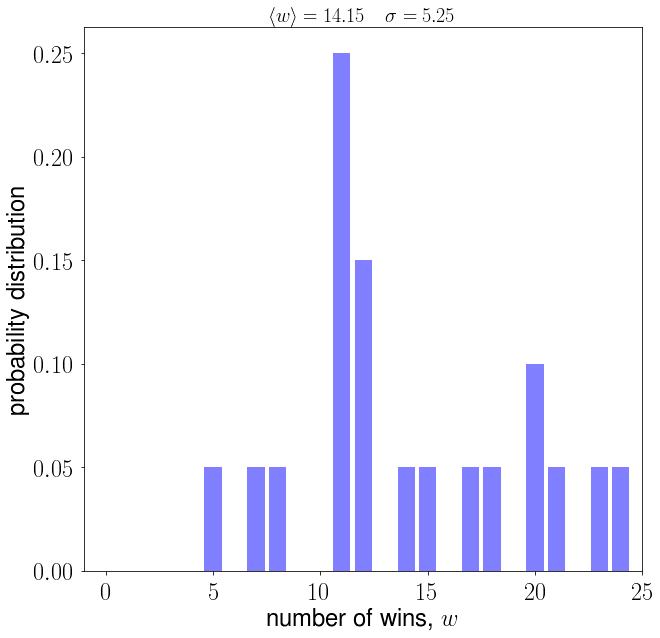

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

#####################################
##Measure probability distribution. computes also average
## value and standard deviation
#####
def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
    std_dev = np.sqrt(variance)
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, std_dev

#####################################







###################################


pdf, av, var = measure_probability_distribution (list_of_wins)






##visualize histogram

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


title = '$\\langle w \\rangle = ' + '% .2f' % av + ' \\quad \\sigma = ' + '% .2f' % var + '$'

plt.title(title, fontsize = 20)


plt.xlabel('number of wins, $w$')
plt.ylabel('probability distribution')


##construct two lists for  visualization
x = []
Px = []
for q in pdf:
    x.append(q)
    Px.append(pdf[q])
    

plt.bar(x, Px, color = 'blue', align='center', alpha=0.5)

plt.xlim(-1, 25)
#plt.yscale('log')

plt.show()

<p>The histogram above shows that the majority of the Serie A teams(about 40%) have 11 or 12 wins in one season. The distribution shows that most of the Serie A teams are in the middle of the league. Only a few of them can be considered as top team or bottom team in the league.</p>

<center><h2>Scatter plot of the fluctuation degree</h2></center>
<p>As a second example of the data analysis, we visualize the correlation between the standard deviation of a team's ranking in five seasons and the average of their ranking in five seasons.</p>
<br>
<p>First, we generate a list of average ranking and another list of standard deviation.</p>

In [31]:
ranking = {}
for key in Dataset.keys():
    for e in range(len(Dataset[key])):
        #print (Dataset[key][e])
        team = Dataset[key][e][1]
        if team not in ranking:
            ranking[team] = []
        ranking[team].append(float(Dataset[key][e][0]))


avg_ranking = {}
std_ranking = {}
for team in ranking:
    avg_ranking[team] = np.mean(ranking[team])
    std_ranking[team] = np.std(ranking[team])
    
print (ranking)
print (avg_ranking)
print (std_ranking)

{'HELLAS VERONA': [10.0, 20.0, 13.0], 'NOVARA': [19.0], 'SAMPDORIA': [18.0, 14.0, 12.0, 15.0, 7.0], 'PALERMO': [8.0, 18.0, 16.0, 16.0, 11.0], 'LAZIO': [5.0, 7.0, 9.0, 8.0, 4.0, 3.0], 'CATANIA': [13.0, 8.0, 18.0, 11.0], 'GENOA': [10.0, 17.0, 14.0, 11.0, 17.0, 6.0], 'FIORENTINA': [9.0, 4.0, 4.0, 5.0, 13.0, 4.0], 'CHIEVOVERONA': [11.0, 12.0, 16.0, 9.0, 10.0, 14.0], 'BOLOGNA': [16.0, 13.0, 19.0, 14.0, 9.0], 'FROSINONE': [19.0], 'TORINO': [16.0, 7.0, 12.0, 9.0], 'INTER': [2.0, 9.0, 5.0, 4.0, 6.0, 8.0], 'LECCE': [17.0, 18.0], 'BARI': [20.0], 'SASSUOLO': [17.0, 6.0, 12.0], 'JUVENTUS': [7.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'EMPOLI': [10.0, 15.0], 'ROMA': [6.0, 6.0, 2.0, 3.0, 7.0, 2.0], 'PARMA': [12.0, 10.0, 6.0, 8.0, 20.0], 'BRESCIA': [19.0], 'UDINESE': [4.0, 5.0, 13.0, 17.0, 3.0, 16.0], 'SIENA': [19.0, 14.0], 'MILAN': [1.0, 3.0, 8.0, 7.0, 2.0, 10.0], 'PESCARA': [20.0], 'CARPI': [18.0], 'NAPOLI': [3.0, 2.0, 3.0, 2.0, 5.0, 5.0], 'LIVORNO': [20.0], 'ATALANTA': [15.0, 11.0, 13.0, 12.0, 17.0], 'CAGLIARI

In [30]:
import operator

sorted_avg_ranking = sorted(avg_ranking.items(), key=operator.itemgetter(1))


print (sorted_avg_ranking)

[('JUVENTUS', 2.0), ('NAPOLI', 3.3333333333333335), ('ROMA', 4.333333333333333), ('MILAN', 5.166666666666667), ('INTER', 5.666666666666667), ('LAZIO', 6.0), ('FIORENTINA', 6.5), ('UDINESE', 9.6666666666666661), ('TORINO', 11.0), ('PARMA', 11.199999999999999), ('SASSUOLO', 11.666666666666666), ('CHIEVOVERONA', 12.0), ('CATANIA', 12.5), ('GENOA', 12.5), ('EMPOLI', 12.5), ('SAMPDORIA', 13.199999999999999), ('ATALANTA', 13.6), ('PALERMO', 13.800000000000001), ('BOLOGNA', 14.199999999999999), ('HELLAS VERONA', 14.333333333333334), ('CAGLIARI', 14.6), ('SIENA', 16.5), ('LECCE', 17.5), ('CARPI', 18.0), ('CESENA', 18.0), ('NOVARA', 19.0), ('FROSINONE', 19.0), ('BRESCIA', 19.0), ('BARI', 20.0), ('PESCARA', 20.0), ('LIVORNO', 20.0)]


<p>Then, we generate a scatter plot.</p>

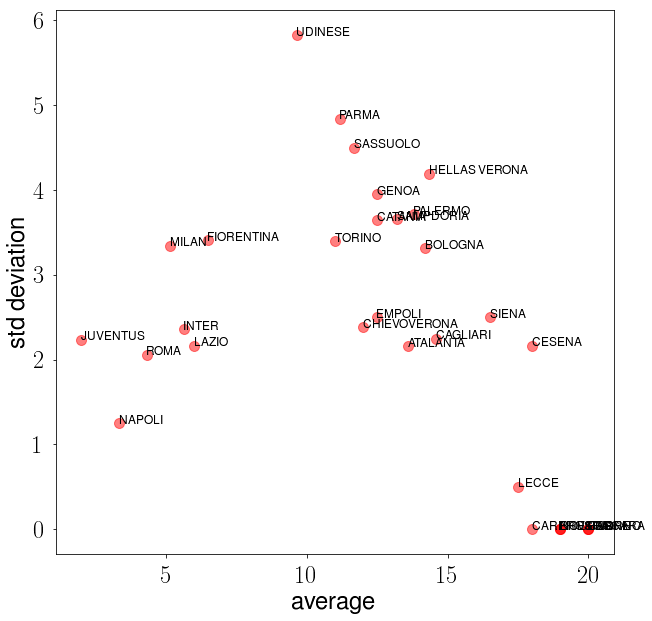

In [35]:
##visualize histogram

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8





plt.xlabel('average')
plt.ylabel('std deviation')


##construct two lists for  visualization
x = []
y = []
for team in avg_ranking:
    x.append(avg_ranking[team])
    y.append(std_ranking[team])
    plt.text(avg_ranking[team], std_ranking[team], team, fontsize=12)
    

plt.plot(x, y, color = 'red', marker='o', markersize=10, lw=0,  alpha=0.5)



plt.show()

<p>The scatter plot figure shows that top teams on the left like Juventus, Napoli, Roma, and Inter are very steady in their positions of the league. Middle teams like Udinese, Parma, Sassuolo, and Genoa are extremely fluctuated. The bottom teams like Bari, Pescara, and Novara only have one appearance in Serie A and then back to Serie B. So they have no fluctuation in their performance.</p>

<center><h1>Conclusion</h1></center>
<p>In conclusion, most of the teams in Serie A are in the middle of the league. Most of them rank between 6-15 in the league and win 11 or 12 games each season. Only a few top teams like Juventus, Roma, Napoli, and Inter can constantly stay in the top of the league. Teams like Bari, Pescara, and Novara only appear once in Serie A then back to Serie B. So they have 0 standard deviations. Only a few of them can compete for the champion, but most of them are safe to stay in Serie A.</p>